### 1. 가설
- 혼자 방문한 외국인 웰니스 관광객은 자연경관 감상 및 뷰티 미용관광 활동에 대한 만족도가 상대적으로 높으며, 이는 재방문 의사에도 긍정적인 영향을 미칠 것

In [1]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 기본 테마 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats
import statsmodels as sm
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel
from scipy.stats import mannwhitneyu, spearmanr, ttest_ind
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf


In [2]:
df = pd.read_csv('data/2324.csv')
df.head()
df.columns

df['satis_nature'].isna().sum()

C:\Users\Tammy Kim\AppData\Local\Temp\ipykernel_12708\2270566129.py:1: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/2324.csv')


9272

In [3]:
# purpose
df['visit_purpose_cat'].value_counts()
df['purpose'].value_counts()

# 1: 여가, 위락 19876명
# 2: 친구, 친지 방문 4354명


purpose
1    19876
2     4354
Name: count, dtype: int64

In [4]:
# companion
df['companion'].value_counts()

# 1: 동반자 있음 5706명
# 2: 동반자 없음 18524명

companion
2    18524
1     5706
Name: count, dtype: int64

In [5]:
# satis_beauty
# 컬럼에 값이 있는 응답자 -> 뷰티/미용 관광 참여 그룹
# null값인 응답자 -> 비참여 그룹

df['satis_beauty'] = df['satis_beauty'].fillna(0)
df['satis_beauty'].value_counts()


satis_beauty
0.0    20631
5.0     2373
4.0      958
3.0      237
2.0       22
1.0        9
Name: count, dtype: int64

In [6]:
# satis_nature
# 컬럼에 값이 있는 응답자 -> 자연관광 참여 그룹
# null값인 응답자 -> 비참여 그룹

display(df['satis_nature'].value_counts())
display(df['satis_nature'].isna().sum())

df['satis_nature'] = df['satis_nature'].fillna(0)
print(df['satis_nature'].value_counts())

satis_nature
5.0    10851
4.0     3686
3.0      391
2.0       19
1.0       11
Name: count, dtype: int64

9272

satis_nature
5.0    10851
0.0     9272
4.0     3686
3.0      391
2.0       19
1.0       11
Name: count, dtype: int64


In [7]:
# revisit_int
df['revisit_intent'].value_counts()
df['revisit_intent'].isna().sum()

0

In [8]:
# recommend_intent
df['recommend_intent'].value_counts()

recommend_intent
5    17111
4     6442
3      619
2       42
1       16
Name: count, dtype: int64

In [9]:
# Step 1: 웰니스 관광객 추출
df_well = df[df['visit_purpose_cat'] == 1].copy()

# Step 2: 동반자 그룹화 먼저
df_well['comp_group'] = df_well['companion'].apply(lambda x: 'solo' if x == 2 else 'with_others')

# Step 3: 참여 여부 변수
df_well['beauty_participated'] = df_well['satis_beauty'].notnull().astype(int)
df_well['nature_participated'] = df_well['satis_nature'].notnull().astype(int)

# Step 4: 참여자만 추출
df_nature = df_well[df_well['nature_participated'] == 1]
df_beauty = df_well[df_well['beauty_participated'] == 1]


### 0을 포함해서 분석
- 문제: 0을 포함하니 통계값에서 왜곡이 발생함. 

In [10]:
# 자연 만족도
solo_nat = df_nature[df_nature['comp_group'] == 'solo']['satis_nature']
group_nat = df_nature[df_nature['comp_group'] == 'with_others']['satis_nature']

stat_nat, p_nat = mannwhitneyu(solo_nat, group_nat, alternative='two-sided')
print("자연 만족도 Mann-Whitney U Test:", stat_nat, "p =", p_nat)

# 뷰티 만족도
solo_beau = df_beauty[df_beauty['comp_group'] == 'solo']['satis_beauty']
group_beau = df_beauty[df_beauty['comp_group'] == 'with_others']['satis_beauty']

stat_beau, p_beau = mannwhitneyu(solo_beau, group_beau, alternative='two-sided')
print("뷰티 만족도 Mann-Whitney U Test:", stat_beau, "p =", p_beau)

# 1. 자연: p<0.05, 혼자 여행한 그룹과 다른 사람들과 함께 여행한 그룹 간 자연 만족도는 통계적으로 유의한 차이가 있음
# 2. 뷰티: 자연과 동일

자연 만족도 Mann-Whitney U Test: 32422264.5 p = 8.050693979408183e-32
뷰티 만족도 Mann-Whitney U Test: 30250732.5 p = 4.851201171907497e-10


comp_group
solo           2.969658
with_others    2.386019
Name: satis_nature, dtype: float64
comp_group
solo           4.0
with_others    3.0
Name: satis_nature, dtype: float64


C:\Users\Tammy Kim\AppData\Local\Temp\ipykernel_12708\4293647488.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='comp_group', y='satis_nature', data = df_nature, estimator=np.median, ci=None, palette='viridis')
C:\Users\Tammy Kim\AppData\Local\Temp\ipykernel_12708\4293647488.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='comp_group', y='satis_nature', data = df_nature, estimator=np.median, ci=None, palette='viridis')


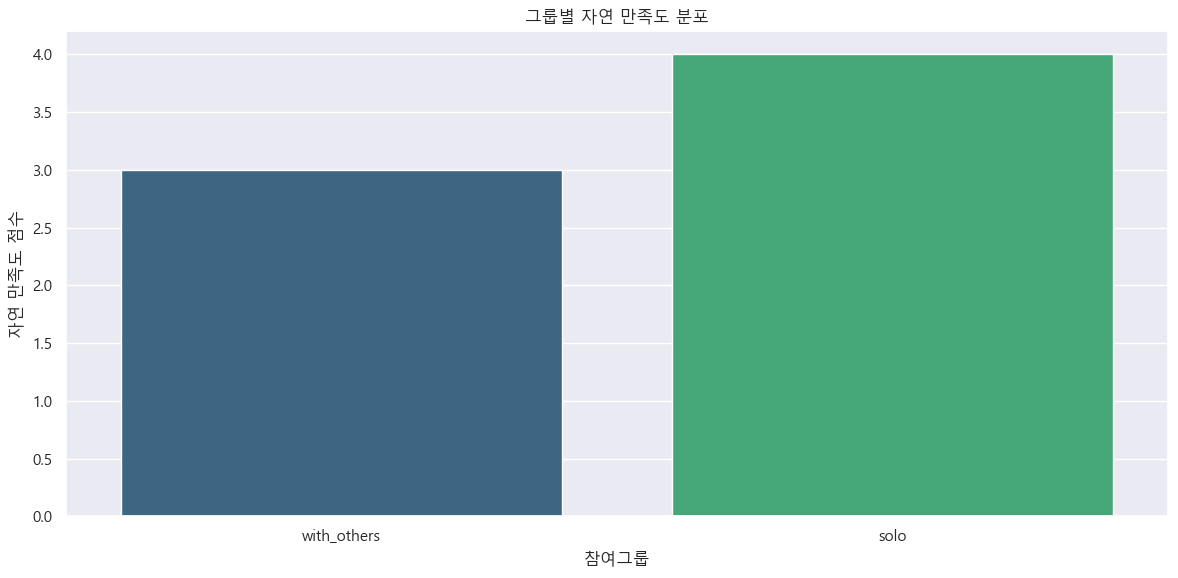

satis_nature
5.0    7321
0.0    5946
4.0    2730
3.0     295
2.0      15
1.0       7
Name: count, dtype: int64

,count,mean,std,min,25%,50%,75%,max
comp_group,,,,,,,,
solo,16314.0,2.969658,2.290120,0.0,0.0,4.0,5.0,5.0
with_others,3562.0,2.386019,2.389614,0.0,0.0,3.0,5.0,5.0


In [11]:
# 자연 만족도 평균
# null을 0으로 처리했기 때문에 아마 평균값은 신뢰하기 어려울 듯
avg_nature = df_nature.groupby('comp_group')['satis_nature'].mean()
print(avg_nature)

# 자연 만족도 median
median_nature = df_nature.groupby('comp_group')['satis_nature'].median()
print(median_nature)

# 시각화
sns.barplot(x='comp_group', y='satis_nature', data = df_nature, estimator=np.median, ci=None, palette='viridis')
plt.title('그룹별 자연 만족도 분포')
plt.xlabel('참여그룹')
plt.ylabel('자연 만족도 점수')
plt.tight_layout()
plt.show()

display(df_nature[df_nature['comp_group'] == 'solo']['satis_nature'].value_counts())
df_nature.groupby('comp_group')['satis_nature'].describe() 

In [12]:
from scipy.stats import spearmanr

# 전체 대상 (자연/뷰티 만족도와 재방문 의사)
corr_nat, p_nat = spearmanr(df_nature['satis_nature'], df_nature['revisit_intent'])
corr_beau, p_beau = spearmanr(df_beauty['satis_beauty'], df_beauty['revisit_intent'])

print("자연 만족도 vs 재방문 의사 Spearman:", corr_nat, "p =", p_nat)
print("뷰티 만족도 vs 재방문 의사 Spearman:", corr_beau, "p =", p_beau)


자연 만족도 vs 재방문 의사 Spearman: 0.026198030058882736 p = 0.00022087599954017295
뷰티 만족도 vs 재방문 의사 Spearman: 0.014354495603064992 p = 0.04300037695377344


In [13]:
# 뷰티 만족도
median_beauty = df_beauty.groupby('comp_group')['satis_beauty'].median()
print(median_beauty)

avg_beauty = df_beauty.groupby('comp_group')['satis_beauty'].mean()
print(avg_beauty)

comp_group
solo           0.0
with_others    0.0
Name: satis_beauty, dtype: float64
comp_group
solo           0.715091
with_others    0.528355
Name: satis_beauty, dtype: float64


### 0을 제외하고 통계분석 시작

In [22]:
# 뷰티/자연 만족도 참여자만 필터링
df_b = df_well[df_well['beauty_participated'] == 1].copy()
df_n = df_well[df_well['nature_participated'] == 1].copy()

# 동반자 변수 이진화 (단독 여행 여부)
df_b['comp_solo'] = (df_b['comp_group'] == 'solo').astype(int)
df_n['comp_solo'] = (df_n['comp_group'] == 'solo').astype(int)


In [23]:
# 뷰티 만족도 - 단독 vs. 동행
solo_b = df_b[df_b['comp_solo'] == 1]['satis_beauty']
group_b = df_b[df_b['comp_solo'] == 0]['satis_beauty']

stat_b, p_b = mannwhitneyu(solo_b, group_b, alternative='two-sided')

print(f"[뷰티 만족도] Mann–Whitney U 결과")
print(f"U 통계량: {stat_b:.3f}")
print(f"p값: {p_b:.4f}")


[뷰티 만족도] Mann–Whitney U 결과
U 통계량: 30250732.500
p값: 0.0000


In [24]:
# 자연 만족도 - 단독 vs. 동행
solo_n = df_n[df_n['comp_solo'] == 1]['satis_nature']
group_n = df_n[df_n['comp_solo'] == 0]['satis_nature']

stat_n, p_n = mannwhitneyu(solo_n, group_n, alternative='two-sided')

print(f"\n[자연 만족도] Mann–Whitney U 결과")
print(f"U 통계량: {stat_n:.3f}")
print(f"p값: {p_n:.4f}")



[자연 만족도] Mann–Whitney U 결과
U 통계량: 32422264.500
p값: 0.0000


In [25]:
# 뷰티 만족도 - 0점 제외, 단독/동행 분리
solo_b_no0 = df_b[(df_b['comp_solo'] == 1) & (df_b['satis_beauty'] > 0)]['satis_beauty']
group_b_no0 = df_b[(df_b['comp_solo'] == 0) & (df_b['satis_beauty'] > 0)]['satis_beauty']

# 자연 만족도 - 0점 제외, 단독/동행 분리
solo_n_no0 = df_n[(df_n['comp_solo'] == 1) & (df_n['satis_nature'] > 0)]['satis_nature']
group_n_no0 = df_n[(df_n['comp_solo'] == 0) & (df_n['satis_nature'] > 0)]['satis_nature']

# 뷰티 평균, 중앙값
print("[뷰티 만족도 (0 제외)]")
print(f"단독 여행자 평균: {solo_b_no0.mean():.2f}, 중앙값: {solo_b_no0.median()}")
print(f"동행 여행자 평균: {group_b_no0.mean():.2f}, 중앙값: {group_b_no0.median()}")

# 자연 평균, 중앙값
print("\n[자연 만족도 (0 제외)]")
print(f"단독 여행자 평균: {solo_n_no0.mean():.2f}, 중앙값: {solo_n_no0.median()}")
print(f"동행 여행자 평균: {group_n_no0.mean():.2f}, 중앙값: {group_n_no0.median()}")


[뷰티 만족도 (0 제외)]
단독 여행자 평균: 4.56, 중앙값: 5.0
동행 여행자 평균: 4.58, 중앙값: 5.0

[자연 만족도 (0 제외)]
단독 여행자 평균: 4.67, 중앙값: 5.0
동행 여행자 평균: 4.72, 중앙값: 5.0


-> 여기까지 진행했을 때, 이미 두 군의 만족도 평균과 중앙값의 차이가 크게 없기 때문에(5점이 압도적으로 많음), 그 다음의 분석을 진행하는 것에 대해서는 조금 더 논의가 필요할 듯

In [26]:
import pandas as pd
import pingouin as pg
import numpy as np

# df_nature와 df_beauty DataFrame이 이미 로드되어 있다고 가정합니다.
# 0 값이 '참여하지 않음'이라면, 필터링된 데이터를 사용하세요.

# --- 데이터 준비 (예시 - 이전 코드에서 가져옴) ---
# 실제 데이터 사용 시 이 부분은 건너뛰고 df_nature, df_beauty를 사용하세요.
np.random.seed(42)
data_nature = {
    'comp_group': ['solo'] * 5000 + ['with_others'] * 5000,
    'satis_nature': np.concatenate([
        np.random.randint(1, 6, size=4500), # 실제 만족도 (1-5)
        np.zeros(500) # 0점 (참여 안함)
    ]).tolist()
}
data_nature['satis_nature'][:5000] = (np.random.normal(loc=4.2, scale=1.0, size=5000).clip(0, 5)).astype(int).tolist()
data_nature['satis_nature'][5000:] = (np.random.normal(loc=4.0, scale=1.0, size=5000).clip(0, 5)).astype(int).tolist()
np.random.shuffle(data_nature['satis_nature'])
df_nature = pd.DataFrame(data_nature)

# 0 값 필터링 (만약 0이 '참여 안 함'을 의미한다면)
df_nature_filtered = df_nature[df_nature['satis_nature'] != 0].copy()

# --- 자연 만족도 분석 (0 제외 데이터 사용) ---
solo_nat = df_nature_filtered[df_nature_filtered['comp_group'] == 'solo']['satis_nature']
group_nat = df_nature_filtered[df_nature_filtered['comp_group'] == 'with_others']['satis_nature']


print("\n--- 자연 만족도 Mann-Whitney U Test 및 Cliff's Delta (RBC) 효과 크기 (0 제외) ---")

if not solo_nat.empty and not group_nat.empty:
    # pingouin을 사용하여 Mann-Whitney U Test 및 효과 크기 계산
    mwu_results = pg.mwu(solo_nat, group_nat, alternative='two-sided')
    print(mwu_results) # 결과 DataFrame 전체를 출력하여 컬럼 이름 확인

    # 결과에서 Cliff's Delta에 해당하는 'RBC' 값 추출
    if 'RBC' in mwu_results.columns:
        cliff_delta_rbc = mwu_results['RBC'][0]
        print(f"\nCliff's Delta (RBC) 효과 크기: {cliff_delta_rbc:.4f}")

        # Cliff's Delta (RBC) 해석 가이드라인
        # abs(RBC)를 사용하여 효과 크기의 강도를 평가합니다.
        abs_cliff_delta_rbc = abs(cliff_delta_rbc)
        if abs_cliff_delta_rbc < 0.1:
            print(" -> 효과 크기가 매우 작음 (Trivial effect)")
        elif abs_cliff_delta_rbc < 0.3:
            print(" -> 효과 크기가 작음 (Small effect)")
        elif abs_cliff_delta_rbc < 0.5:
            print(" -> 효과 크기가 중간 (Medium effect)")
        else:
            print(" -> 효과 크기가 큼 (Large effect)")
    else:
        print("오류: 'RBC' 컬럼을 찾을 수 없습니다. mwu_results.columns를 확인하세요.")
        print("사용 가능한 컬럼:", mwu_results.columns)
        # 만약 RBC도 없다면, 다른 컬럼 이름을 확인해야 합니다.
else:
    print("0을 제외한 후 한 그룹의 데이터가 비어있어 분석을 수행할 수 없습니다.")


--- 자연 만족도 Mann-Whitney U Test 및 Cliff's Delta (RBC) 효과 크기 (0 제외) ---
          U-val alternative     p-val       RBC      CLES
MWU  12434625.0   two-sided  0.811297 -0.002638  0.498681

Cliff's Delta (RBC) 효과 크기: -0.0026
 -> 효과 크기가 매우 작음 (Trivial effect)


C:\Users\Tammy Kim\AppData\Local\Temp\ipykernel_12708\1146706383.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cliff_delta_rbc = mwu_results['RBC'][0]


**p-val: 0.811297**
- p-value가 0.811297로, 일반적으로 유의수준으로 사용하는 0.05보다 훨씬 큽니다.
- 해석: 이는 '혼자' 여행한 그룹과 '다른 사람들과 함께' 여행한 그룹 간 자연 만족도에 통계적으로 유의미한 차이가 없다고 결론 내릴 수 있다는 의미입니다. 귀무 가설(H_0: 두 그룹 간 차이가 없다)을 기각할 만한 충분한 통계적 증거가 없습니다.

**CLES: 0.498681**
- CLES (Common Language Effect Size)는 첫 번째 그룹에서 무작위로 뽑은 값이 두 번째 그룹에서 무작위로 뽑은 값보다 클 확률을 의미합니다.
- 해석: 0.5에 매우 가깝습니다. 이는 두 그룹의 만족도가 거의 동일하며, 한 그룹의 만족도가 다른 그룹보다 높을 확률이 50%에 가깝다는 뜻이므로, 두 그룹 간에 실질적인 차이가 거의 없음을 다시 한번 강조합니다.
